# Student depression classifier 
## The goal of this project is to find the best ML model to determine whether or not a student has depression
## Three different models will be compared to find the lowest error, then the best model will be fit on all the available data 

In [98]:
# importing the libraries 

#data analytics library 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Sikit-learn libraries 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.decomposition import PCA

# Setting up styles 
sns.set_theme()
plt.style.use('ggplot') 

In [99]:
student_depression_original = pd.read_csv("Student Depression Dataset.csv")
student_depression_original

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


# Exploring the data 

In [101]:
student_depression_original.info() # no data is missing 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [102]:
student_depression_original.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [103]:

student_depression_original = student_depression_original.dropna()
student_depression_original = student_depression_original.reset_index().drop(columns=['index'])
student_depression_original

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27893,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27894,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27895,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27896,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


### Descriptive statistics for each numerical column

In [105]:
student_depression_original.describe() 

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000
mean,70442.953402,25.822174,3.141336,0.000430,7.656160,2.943974,0.000681,7.156570,3.139867,0.585526
std,40642.015063,4.905651,1.381462,0.043994,1.470708,1.361122,0.044397,3.707598,1.437347,0.492640
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35040.750000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70689.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105824.750000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [106]:
student_depression_original['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
No     14397
Yes    13501
Name: count, dtype: int64

## Not all the participants are students, therefore, the stress that propagates the depression may come from the work environment. So it may make sense to work only with students.
### I will have to drop the other occupation to have a clean experiment 

In [108]:
student_depression_original['Profession'].value_counts() 

Profession
Student                   27867
Architect                     8
Teacher                       6
Digital Marketer              3
Content Writer                2
Chef                          2
Doctor                        2
Pharmacist                    2
Civil Engineer                1
UX/UI Designer                1
Educational Consultant        1
Manager                       1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

 ## Sleep Duration data should be replaced with numbers; note 'Others' - doesn't have any distinct meaning, therefore must be dropped as well

In [110]:
student_depression_original['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    8309
7-8 hours            7346
5-6 hours            6181
More than 8 hours    6044
Others                 18
Name: count, dtype: int64

In [111]:
student_depression_original['Degree'].value_counts()  # these data should be replaced with number as well with OneHotIncoder

Degree
Class 12    6080
B.Ed        1866
B.Com       1506
B.Arch      1478
BCA         1432
MSc         1190
B.Tech      1152
MCA         1044
M.Tech      1022
BHM          925
BSc          888
M.Ed         821
B.Pharm      810
M.Com        734
BBA          696
MBBS         695
LLB          671
BE           613
BA           600
M.Pharm      582
MD           572
MBA          562
MA           544
PhD          522
LLM          482
MHM          191
ME           185
Others        35
Name: count, dtype: int64

# Visualization for current data

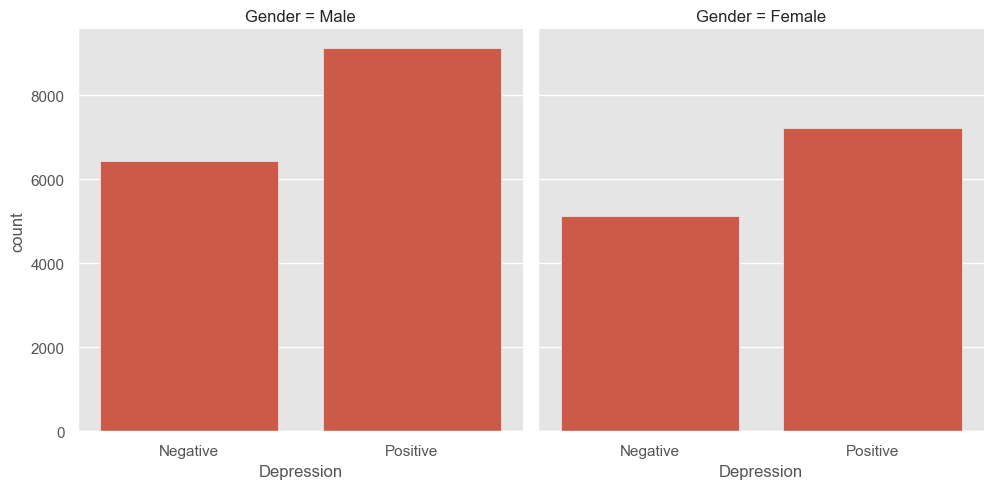

In [113]:
sns.catplot(data=student_depression_original, kind='count', x='Depression', col = 'Gender')
plt.xticks([0,1], labels=['Negative', 'Positive']);

### From the graph, it may seem that males are more predisposed to depression; however, that may be just because there are roughly 3000 more male participants  

In [115]:
 
student_depression_original['Gender'].value_counts() 

Gender
Male      15546
Female    12352
Name: count, dtype: int64

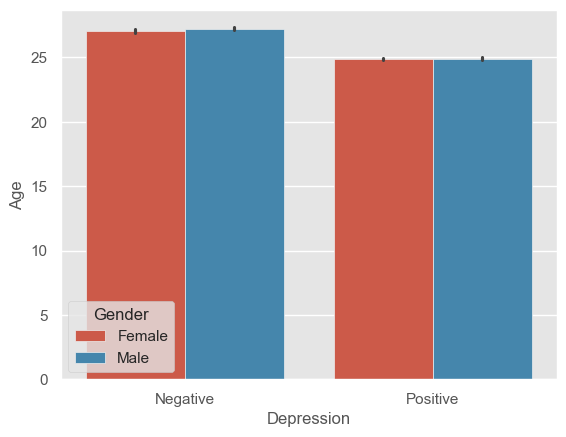

In [116]:
sns.barplot(data=student_depression_original, x='Depression', y='Age', hue='Gender')
plt.xticks([0,1], labels=['Negative', 'Positive']);
# Looks like younger students are a bit more predisposed to depression

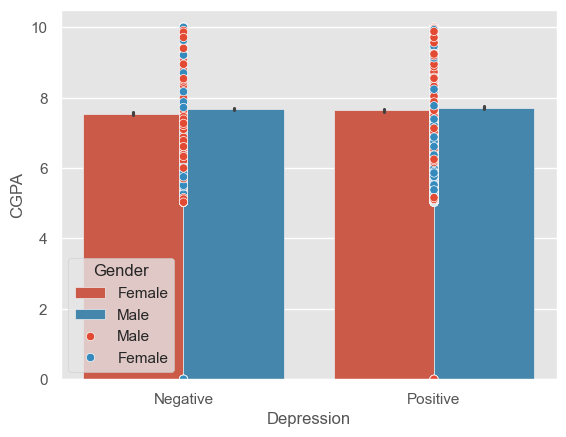

In [117]:
sns.barplot(data=student_depression_original, x='Depression', y='CGPA', hue='Gender')
plt.xticks([0,1], labels=['Negative', 'Positive']);
sns.scatterplot(data=student_depression_original, x='Depression', y='CGPA', hue='Gender')
plt.xticks([0,1], labels=['Negative', 'Positive']);

# No high correlation between CGPA and depression 

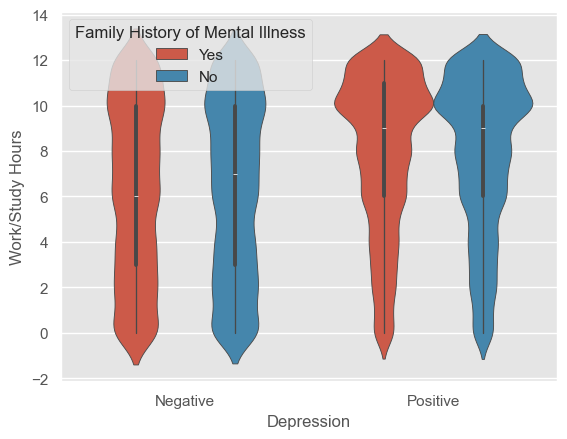

In [118]:
sns.violinplot(data=student_depression_original, x='Depression', y='Work/Study Hours', hue='Family History of Mental Illness')
plt.xticks([0,1], labels=['Negative', 'Positive']);
# Present correlation between Work/Study Hours and depression, Family History of Mental Illness contribution is small for this dataset

# PREPROCESSING 
# Data has a lot none non-numerical values, to proceed further without losing information, this data has to be parsed to numeric. Also, some outliers should be dropped   

In [120]:
student_depression = student_depression_original[student_depression_original['Profession'] =='Student']
student_depression

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27893,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27894,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27895,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27896,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [121]:
student_depression = student_depression.copy()

student_depression['suicidal_thoughts_present'] = (
    student_depression['Have you ever had suicidal thoughts ?']
    .astype(str)
    .map({'Yes': 1, 'No': 0})
)

student_depression['history_of_mental_illness'] = (
    student_depression['Family History of Mental Illness']
    .astype(str)
    .map({'Yes': 1, 'No': 0})
);
student_depression = student_depression.drop(
    columns=['Profession','Have you ever had suicidal thoughts ?','Family History of Mental Illness', 'id']
)

In [122]:
student_depression = student_depression.reset_index().drop(columns=['index'])

### Rest of the non-numeric data can be encoded

In [124]:
encoder = OneHotEncoder()
transformed_data_arr = encoder.fit_transform(student_depression[['Gender','City', 'Sleep Duration','Dietary Habits', 'Degree']])
transformed_data_df = pd.DataFrame(transformed_data_arr.toarray(), columns=encoder.get_feature_names_out())
transformed_data_df[transformed_data_df.isna().any(axis=1)]
transformed_data_df

,Gender_Female,Gender_Male,City_3.0,City_Agra,City_Ahmedabad,City_Bangalore,City_Bhavna,City_Bhopal,City_Chennai,City_City,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27862,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27863,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27864,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27865,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
student_depression_ajasted = student_depression.drop(columns=['Gender','City','Sleep Duration','Dietary Habits','Degree'])

In [126]:
student_depression_final= pd.concat([student_depression_ajasted, transformed_data_df], axis=1)

In [127]:
student_depression_final

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression,suicidal_thoughts_present,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,33.0,5.0,0.0,8.97,2.0,0.0,3.0,1.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24.0,2.0,0.0,5.90,5.0,0.0,3.0,2.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,31.0,3.0,0.0,7.03,5.0,0.0,9.0,1.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28.0,3.0,0.0,5.59,2.0,0.0,4.0,5.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,25.0,4.0,0.0,8.13,3.0,0.0,1.0,1.0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27862,27.0,5.0,0.0,5.75,5.0,0.0,7.0,1.0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27863,27.0,2.0,0.0,9.40,3.0,0.0,0.0,3.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27864,31.0,3.0,0.0,6.61,4.0,0.0,12.0,2.0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27865,18.0,5.0,0.0,6.88,2.0,0.0,10.0,5.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Now, then all columns are numeric, we can check the correlation between the data and the target, which in this case is the Depression column

In [129]:
mosr_corelated_values = np.abs((student_depression_final.corr()['Depression'])).sort_values(ascending=False).iloc[:13]
mosr_corelated_values

Depression                          1.000000
suicidal_thoughts_present           0.546447
Academic Pressure                   0.474764
Financial Stress                    0.363690
Age                                 0.226827
Work/Study Hours                    0.209089
Dietary Habits_Unhealthy            0.189643
Study Satisfaction                  0.168171
Dietary Habits_Healthy              0.164429
Degree_Class 12                     0.131407
Sleep Duration_More than 8 hours    0.081607
Sleep Duration_Less than 5 hours    0.078974
history_of_mental_illness           0.053566
Name: Depression, dtype: float64

# To reduce dimensionality, I'll take only columns with correlation present 

In [131]:
mosr_corelated_values = mosr_corelated_values.index.to_list()


In [132]:
student_depression_final= student_depression_final[mosr_corelated_values]

In [133]:
student_depression_final.info() # this is the final frame 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27867 entries, 0 to 27866
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Depression                        27867 non-null  int64  
 1   suicidal_thoughts_present         27867 non-null  int64  
 2   Academic Pressure                 27867 non-null  float64
 3   Financial Stress                  27867 non-null  float64
 4   Age                               27867 non-null  float64
 5   Work/Study Hours                  27867 non-null  float64
 6   Dietary Habits_Unhealthy          27867 non-null  float64
 7   Study Satisfaction                27867 non-null  float64
 8   Dietary Habits_Healthy            27867 non-null  float64
 9   Degree_Class 12                   27867 non-null  float64
 10  Sleep Duration_More than 8 hours  27867 non-null  float64
 11  Sleep Duration_Less than 5 hours  27867 non-null  float64
 12  hist

<Axes: >

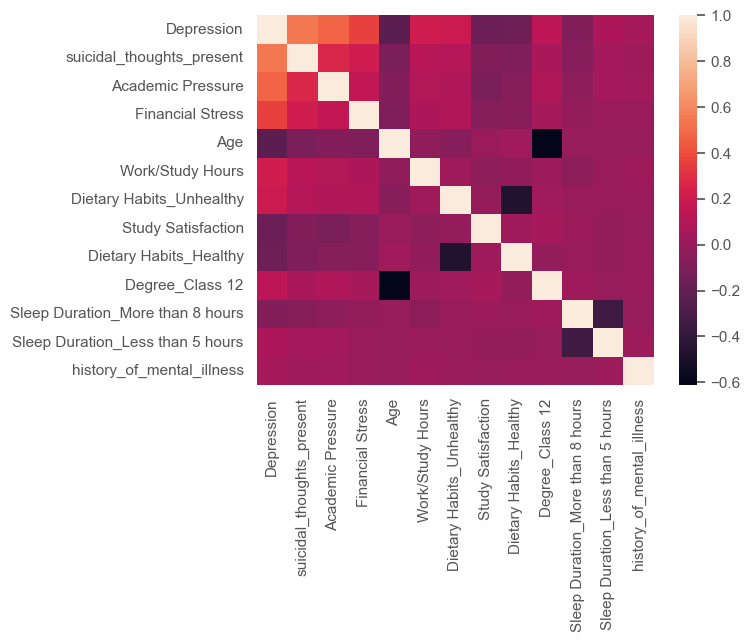

In [134]:
sns.heatmap(student_depression_final.corr())

# Choosing a model 

In [136]:
X = student_depression_final.drop(columns=['Depression'])
y = student_depression_final['Depression']

### Splitting data into training and testing parts 

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [171]:
scaler = StandardScaler()

In [173]:
X_train =  scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [175]:
forest =RandomForestClassifier()

In [179]:
hyperparanms_forest= {'n_estimators':[5,10,50, 100, 200, 500,1000], 'max_depth': [3,4,5,7,9,10,12], 'max_leaf_nodes': [4,6,8,10,12,14,15]}

In [181]:
gridsearch_forest = GridSearchCV(forest, param_grid= hyperparanms_forest, cv=5, verbose=2)

In [ ]:
gridsearch_forest.fit(X_train, y_train)

Fitting 5 folds for each of 343 candidates, totalling 1715 fits
[CV] END ......max_depth=3, max_leaf_nodes=4, n_estimators=5; total time=   0.0s
[CV] END ......max_depth=3, max_leaf_nodes=4, n_estimators=5; total time=   0.0s
[CV] END ......max_depth=3, max_leaf_nodes=4, n_estimators=5; total time=   0.0s
[CV] END ......max_depth=3, max_leaf_nodes=4, n_estimators=5; total time=   0.0s
[CV] END ......max_depth=3, max_leaf_nodes=4, n_estimators=5; total time=   0.0s
[CV] END .....max_depth=3, max_leaf_nodes=4, n_estimators=10; total time=   0.0s
[CV] END .....max_depth=3, max_leaf_nodes=4, n_estimators=10; total time=   0.0s
[CV] END .....max_depth=3, max_leaf_nodes=4, n_estimators=10; total time=   0.0s
[CV] END .....max_depth=3, max_leaf_nodes=4, n_estimators=10; total time=   0.0s
[CV] END .....max_depth=3, max_leaf_nodes=4, n_estimators=10; total time=   0.0s
[CV] END .....max_depth=3, max_leaf_nodes=4, n_estimators=50; total time=   0.1s
[CV] END .....max_depth=3, max_leaf_nodes=4, 